In [66]:
import numpy as np
from dataclasses import dataclass
from typing import Iterable
import plotly.express as px
import numpy as np
import pandas as pd

In [14]:
@dataclass
class LogisticMapSimulation():
    r: complex
    x_0: complex
    
    def logistic_map(r: complex, x: complex) -> complex:
        return r * x * (1 - x)
    
    def run(self, N: int) -> Iterable[complex]:
        x_n = self.x_0
        
        for i in range(N):
            x_n = LogisticMapSimulation.logistic_map(self.r, x_n)
            yield x_n

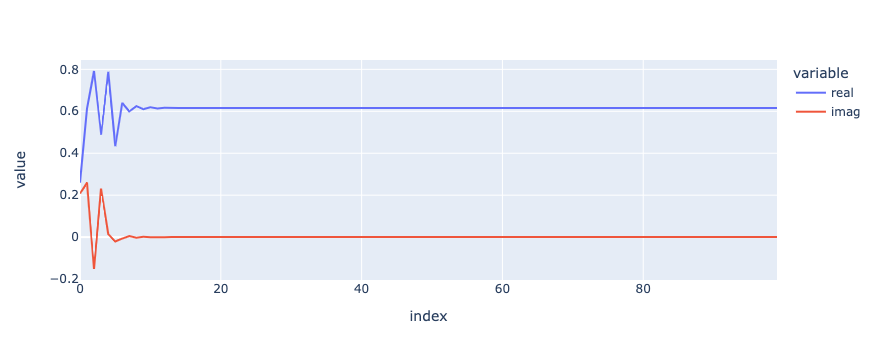

In [132]:
gen = (LogisticMapSimulation(r=2.6, 
                             x_0=0.1 + 0.1j)
       .run(N=100))

X = list(gen)
X_real = [x.real for x in X]
X_imag = [x.imag for x in X]
df = pd.DataFrame({'real': X_real, 'imag': X_imag}).reset_index()
fig_df = df.melt(id_vars='index')
#X_abs = [(x.real ** 2 + x.imag ** 2) ** (1/2) for x in X]
fig = px.line(fig_df, x='index', y='value', color='variable')
#fig.update_layout(yaxis={'range': [-2, 1.1]})
fig.show()

/var/folders/y4/dvc6qr5j30s3frwztjt5shg40000gn/T/ipykernel_83821/2954273325.py:7: RuntimeWarning:

overflow encountered in cdouble_scalars

/var/folders/y4/dvc6qr5j30s3frwztjt5shg40000gn/T/ipykernel_83821/2954273325.py:7: RuntimeWarning:

invalid value encountered in cdouble_scalars

/var/folders/y4/dvc6qr5j30s3frwztjt5shg40000gn/T/ipykernel_83821/2954273325.py:7: RuntimeWarning:

invalid value encountered in multiply



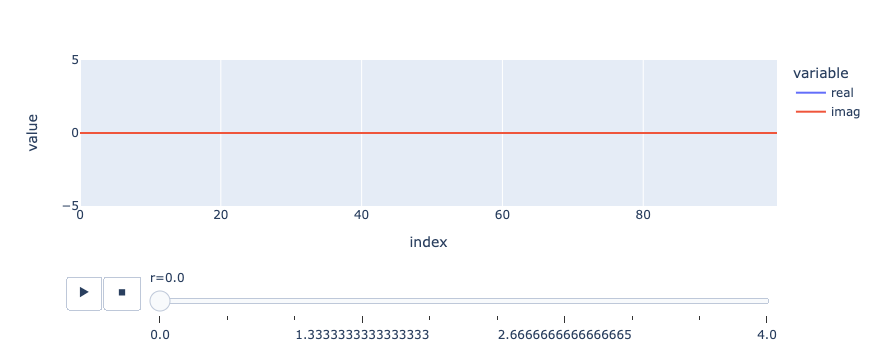

In [142]:
x_0 = 0.1 + 0.01j
r_min = 0.0
r_max = 4.0
N = 100
N_r = 10

R = np.linspace(r_min, r_max, N_r)
dfs = []
for r in R:
    gen = (LogisticMapSimulation(r=r, 
                                 x_0=x_0)
           .run(N=N))

    X = list(gen)
    X_real = [x.real for x in X]
    X_imag = [x.imag for x in X]
    run_df = (pd.DataFrame({'real': X_real, 'imag': X_imag})
                .reset_index()
                .assign(r=r))
    dfs.append(run_df)
    
df = pd.concat(dfs)

fig_df = df.melt(id_vars=['index', 'r'])
#X_abs = [(x.real ** 2 + x.imag ** 2) ** (1/2) for x in X]
fig = px.line(fig_df, 
              x='index', 
              y='value', 
              animation_frame='r',
              #log_y=True,
              color='variable')
fig.update_layout(yaxis={'range': [-5, 5]})
fig.show()